# Edge-Linking-using-Hough-Transform

#### Name : GNANENDRAN N  
#### Reg No. : 212223240037  
#### Slot : 4E6-1  

In [1]:
# Import necessary Librares

import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(959.5), np.float64(539.5), np.float64(-0.5))

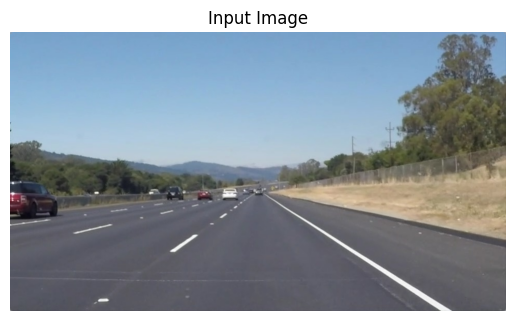

In [2]:
# Read the image

image = cv2.imread('road.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
plt.title("Input Image")
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(539.5), np.float64(-0.5))

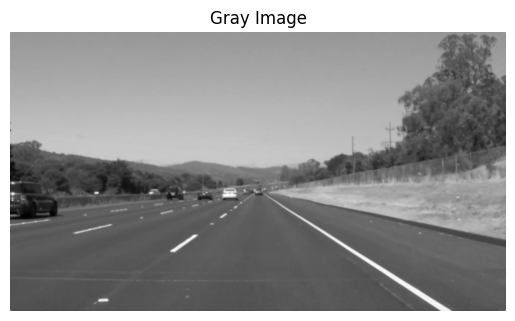

In [3]:
# Grayscale image

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.GaussianBlur(gray_image,(3,3),0)
plt.imshow(gray_image, cmap = 'gray')  
plt.title("Gray Image")
plt.axis('off')

### 1) Create Threshold for Lane Lines

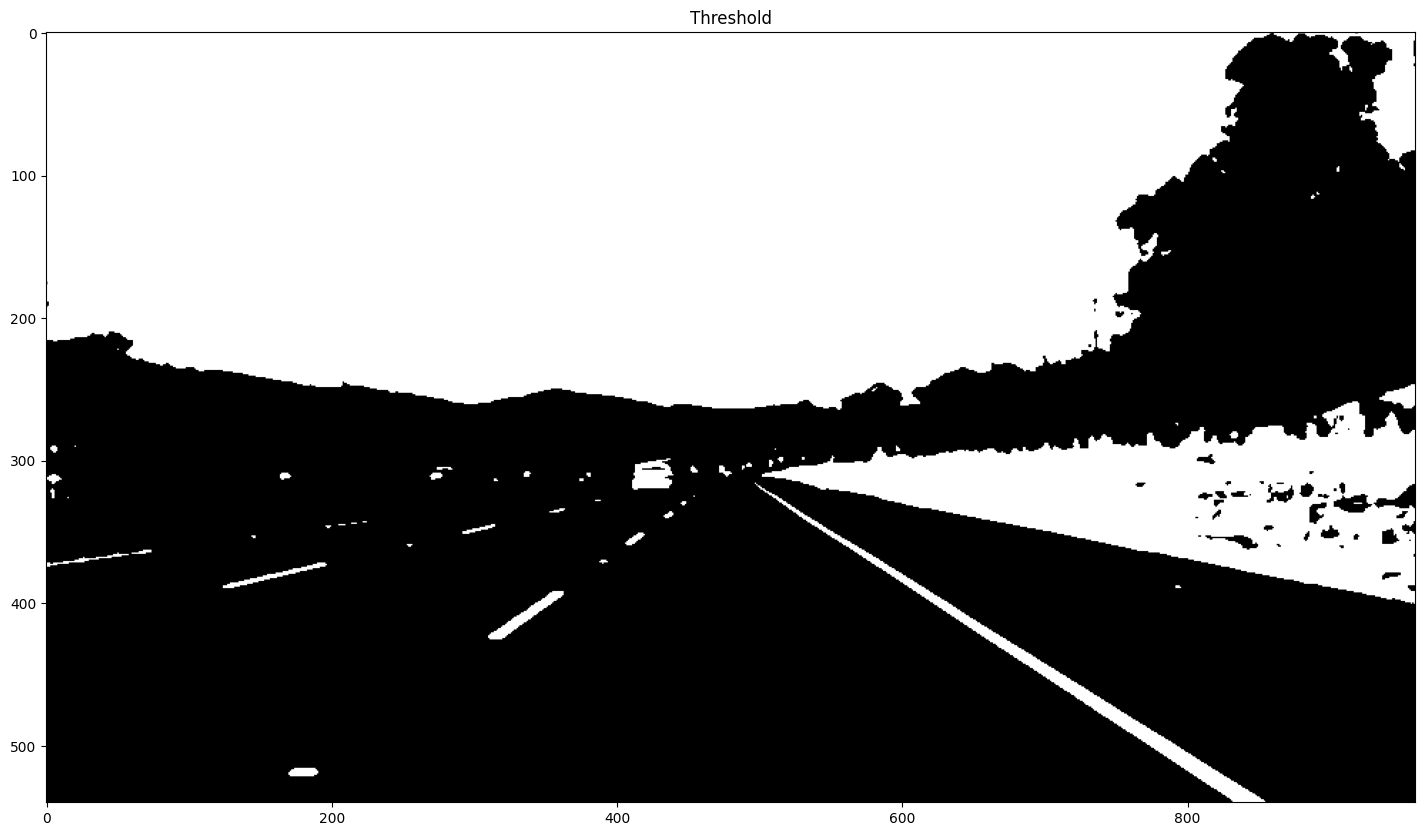

In [4]:
# Use global threshold based on grayscale intensity.
threshold = cv2.inRange(gray_image, 150, 255)

plt.figure(figsize = (20, 10))
plt.subplot(1,1,1); plt.imshow(threshold, cmap = 'gray'); plt.title('Threshold');

### 2) Selecting the Region of Interest Using fillPoly()

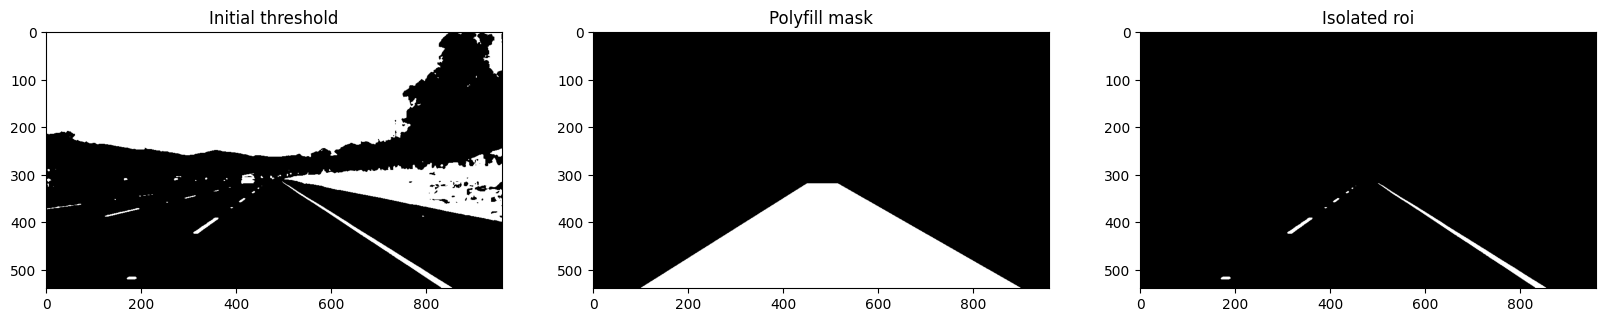

In [5]:
#  Region masking: Select vertices according to the input image.
roi_vertices = np.array([[[100, 540], [900, 540], [515, 320], [450, 320]]])

# Defining a blank mask.
mask = np.zeros_like(threshold)   

# Defining a 3 channel or 1 channel color to fill the mask.
if len(threshold.shape) > 2:
    channel_count = threshold.shape[2]  
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

# Filling pixels inside the polygon.
cv2.fillPoly(mask, roi_vertices, ignore_mask_color)

# Constructing the region of interest based on where mask pixels are nonzero.
roi = cv2.bitwise_and(threshold, mask)

plt.figure(figsize = (20, 10))
plt.subplot(1,3,1); plt.imshow(threshold, cmap = 'gray'); plt.title('Initial threshold')
plt.subplot(1,3,2); plt.imshow(mask, cmap = 'gray'); plt.title('Polyfill mask')
plt.subplot(1,3,3); plt.imshow(roi, cmap = 'gray'); plt.title('Isolated roi');

### 3) Detect Edges and Smooth Noise

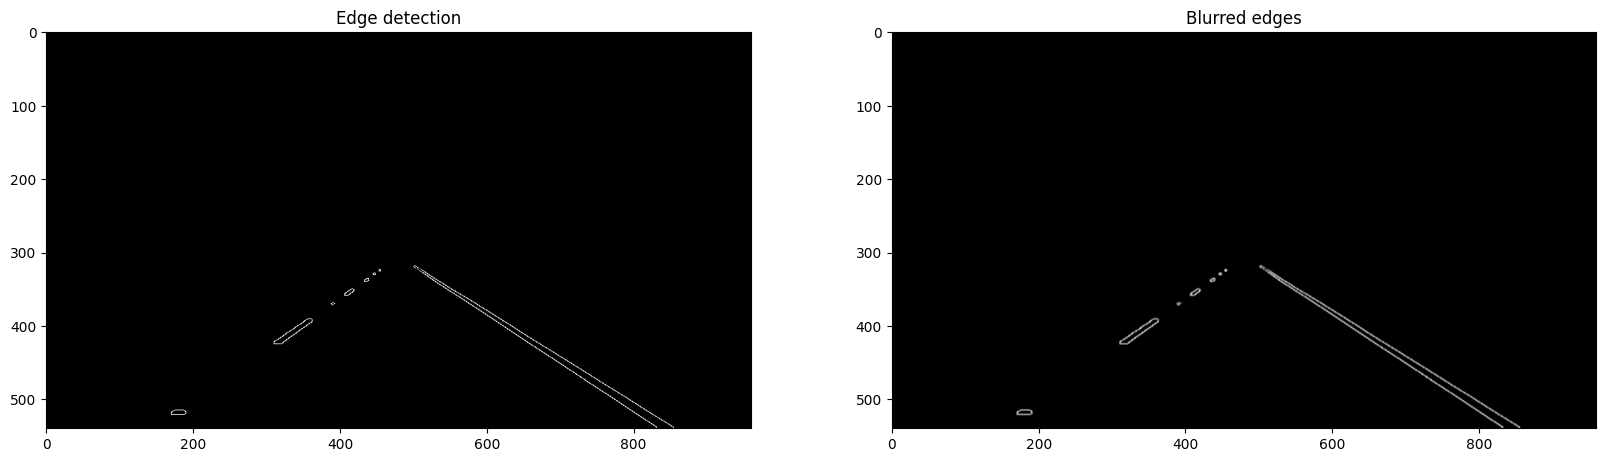

In [6]:
# Perform Edge Detection.
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(roi, low_threshold, high_threshold)

# Smooth with a Gaussian blur.
kernel_size = 3
canny_blur = cv2.GaussianBlur(edges, (kernel_size, kernel_size), 0)

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1); plt.imshow(edges, cmap = 'gray'); plt.title('Edge detection')
plt.subplot(1,2,2); plt.imshow(canny_blur, cmap = 'gray'); plt.title('Blurred edges');

### 4) Line Detection Using HoughLinesP()

In [7]:
def draw_lines(img, lines, color = [255, 0, 0], thickness = 2):
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

Found 24 lines, including: [[502 318 855 538]]


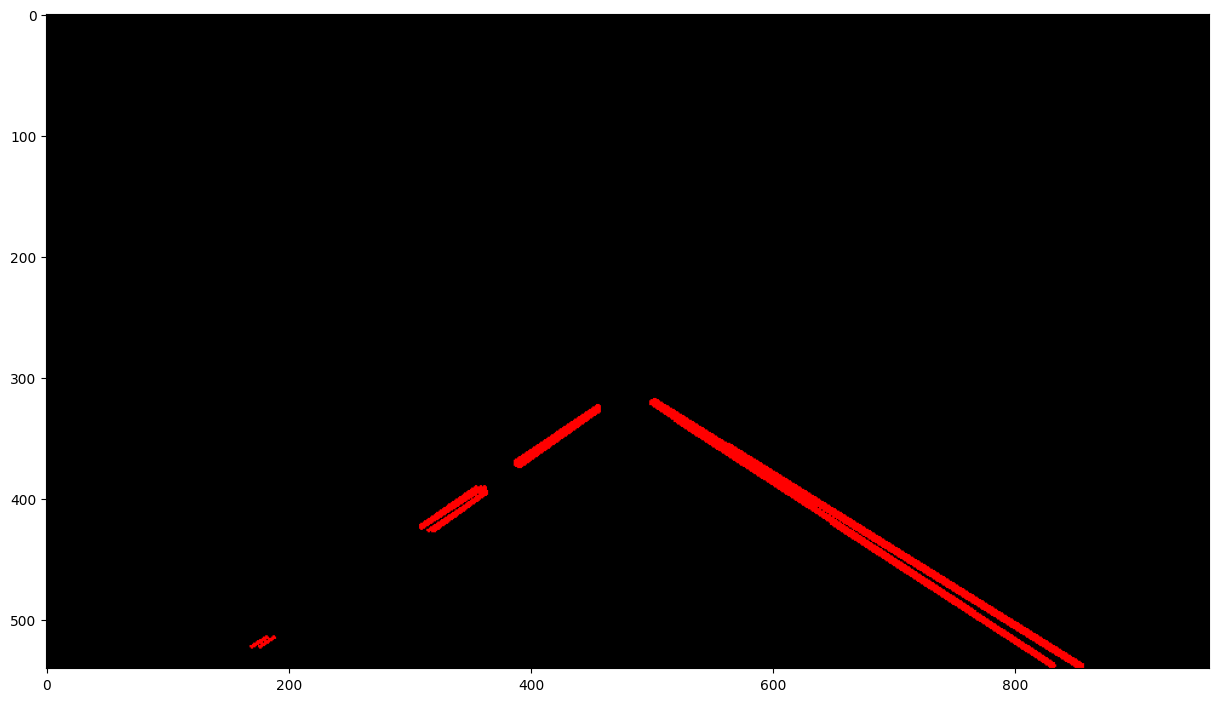

In [8]:
# Hough transform parameters set according to the input image.
rho = 1
theta = np.pi / 180
threshold = 50
min_line_len = 10
max_line_gap = 20

lines = cv2.HoughLinesP(
    canny_blur, rho, theta, threshold, minLineLength = min_line_len, maxLineGap = max_line_gap)

hough = np.zeros((image.shape[0], image.shape[1], 3), dtype = np.uint8)
draw_lines(hough, lines)

print("Found {} lines, including: {}".format(len(lines), lines[0]))
plt.figure(figsize = (15, 10)); plt.imshow(hough);